In [1]:
#imports
#input
import matplotlib.pyplot as plt
import skimage
from skimage import io
from glob import glob

#image represenation
import numpy as np
from numpy import ma
import pandas as pd 

#image processing
from skimage import measure, filters, morphology, feature,segmentation, draw
from skimage.morphology import disk, square

#plotting
import seaborn as sns
import tabulate


In [2]:
radrat = 4

In [3]:
filenames = glob('./tchakamau/Scans_of_balls/FG-w*.csv')
print(filenames)
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]

print(tables, len(tables))

['./tchakamau/Scans_of_balls\\FG-w1x-01.21_001.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_002.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_003.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_004.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_005.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_006.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_007.csv', './tchakamau/Scans_of_balls\\FG-w1x-01.21_008.csv']
[            1           2           3           4           5           6     \
0     324.586639  324.215242  337.671239  327.286409  322.472533  334.485796   
1     334.128684  332.614527  333.128769  340.699552  328.300609  325.757968   
2     341.042380  334.242960  341.385208  351.784323  350.155890  333.885847   
3     339.371094  332.314552  333.071631  340.599561  356.298224  346.241938   
4     353.298479  344.870626  339.671069  330.043317  352.084297  341.542338   
...          ...         ...         ...         ...         ...         ...   
1019   26.983416   23.

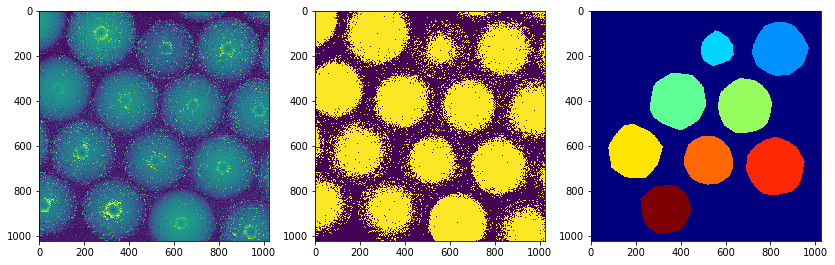

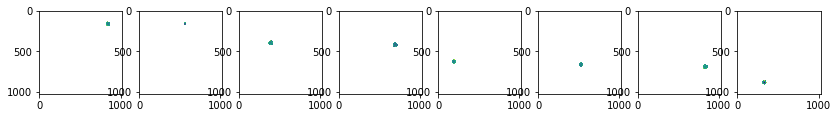

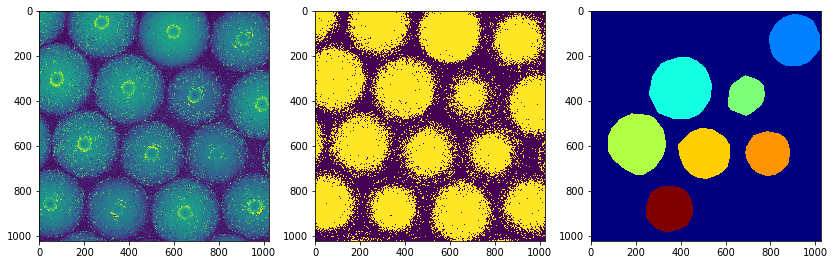

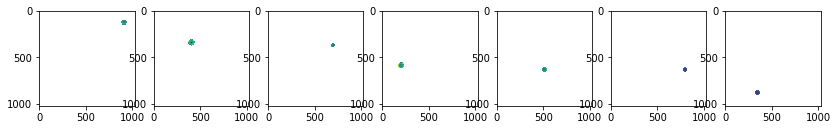

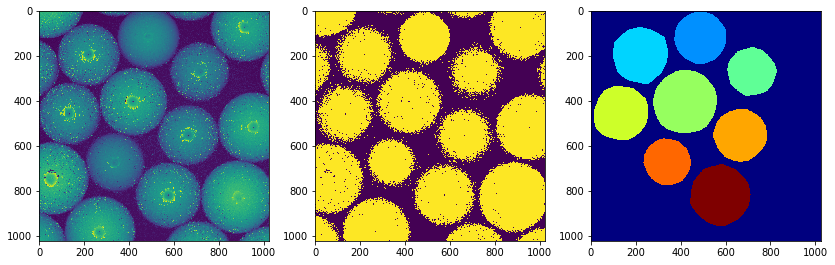

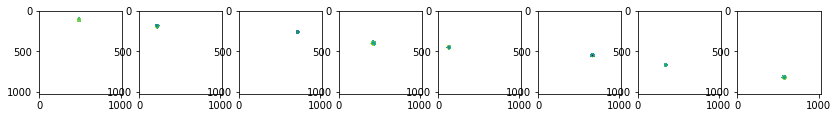

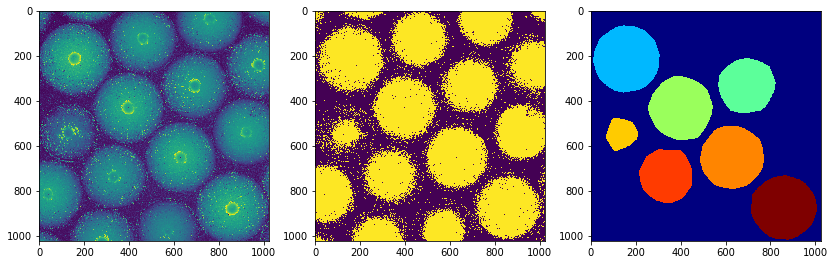

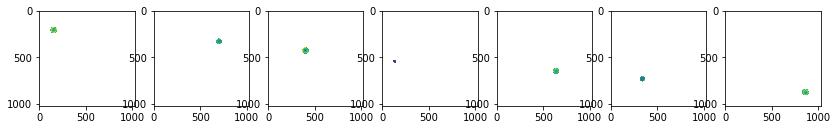

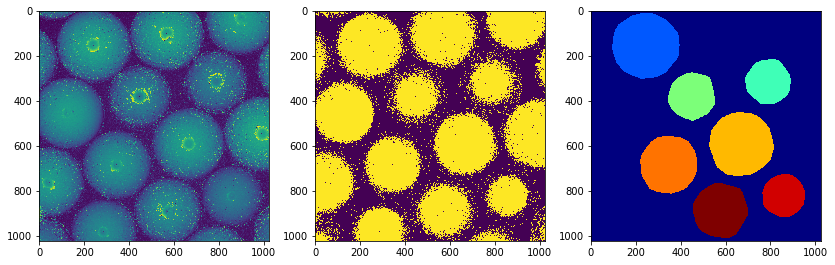

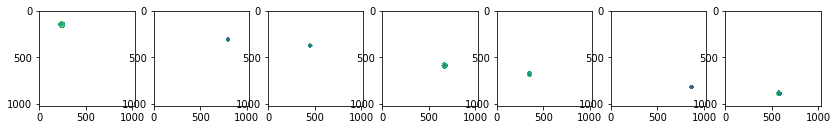

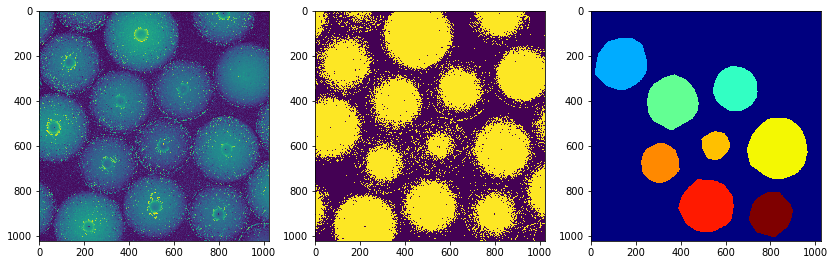

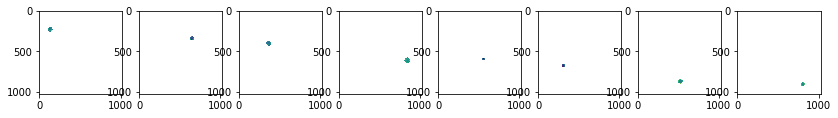

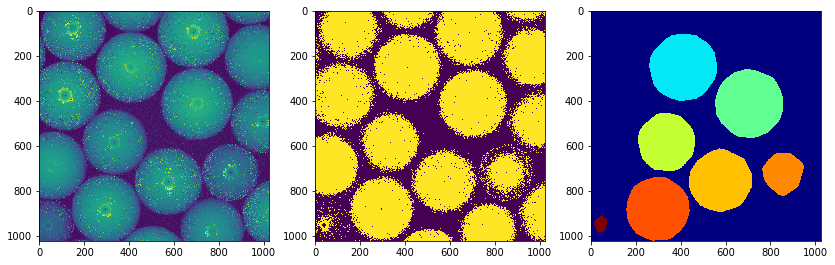

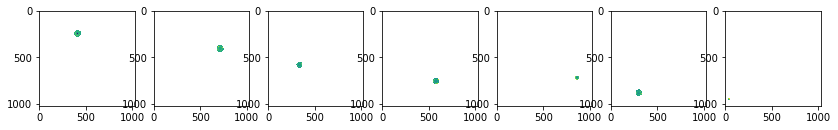

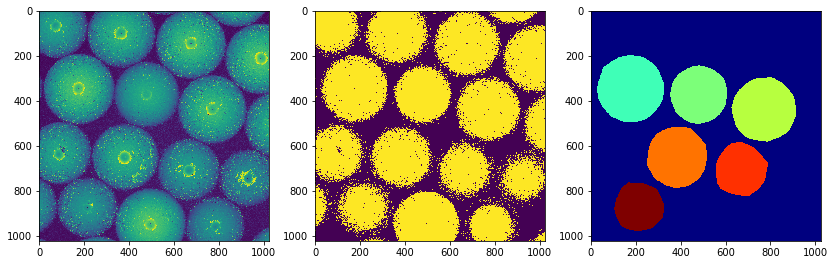

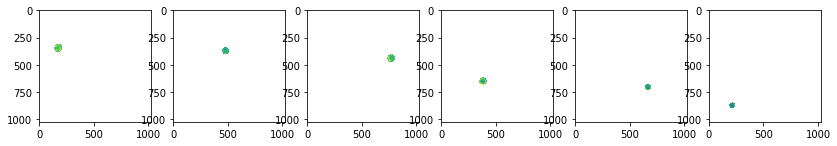

In [4]:
wroughs = []
wmeans = []

for table in tables:
    image = np.array(table, copy=True, order="C")
    fig, ax = plt.subplots(ncols=3,figsize=(14, 10))
    ax[0].imshow(table)
    
    
    #balls = image#morphology.closing(image, disk(3))# 
    bw_balls = image  > filters.threshold_isodata(image)
    filled_balls = morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    labeled_balls = measure.label(filled_balls)
    inner_balls = segmentation.clear_border(labeled_balls)
    ax[1].imshow(bw_balls)
    ax[2].imshow(inner_balls, cmap='jet')
    
    regions = measure.regionprops(inner_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    radii = [x/radrat for x in radii] # use half a radius
    fig, ax = plt.subplots(ncols = len(regions), figsize=(14, 10))
    ind = 0
    for radius, center in zip(radii, centers):
        circle = np.ones_like(image)
        coords=draw.circle(center[0], center[1], radius)
        circle[coords]=0
        ball_cap = ma.masked_array(image, circle)
       # print("min, max, mean of intensity: ", ma.min(ball_cap), ma.max(ball_cap), ma.mean(ball_cap))
        roughness = np.std(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[ind].imshow(ball_cap)
        ind +=1
        

[66.88846270582725, 27.563123024629256, 47.51879269193131, 46.86670090585069, 70.43573800138833, 41.735355436832556, 57.17761232618156, 91.84533720575953, 72.65536445423699, 72.17089475608876, 54.60319608122895, 88.51314533348516, 84.2841100670184, 44.71952688688893, 48.737378442444744, 17.85737668071335, 107.66686642557309, 71.24145019494036, 89.0050065640238, 107.96598195861435, 81.08627958665252, 36.301773194008575, 85.45740682334763, 68.28782444059614, 72.2844596720888, 60.927774794565956, 44.86977191649099, 48.21952040567799, 48.022910159203434, 74.10811915972512, 73.6197361916165, 69.58446509552336, 80.12581851237906, 59.23553974161858, 48.9672236449519, 40.55453819996065, 62.83565386707526, 91.49770849849271, 40.15057031207732, 54.61031206965912, 49.49938729352451, 84.02921338927976, 52.78728911958627, 79.52237603794252, 60.843055488718605, 37.91590315073493, 33.47816053188378, 52.2519821605747, 75.75289510865456, 59.81487924101969, 68.71512313500672, 49.59199693849763, 54.89332

Text(0.5, 0, "Mean value - 'Intensity'")

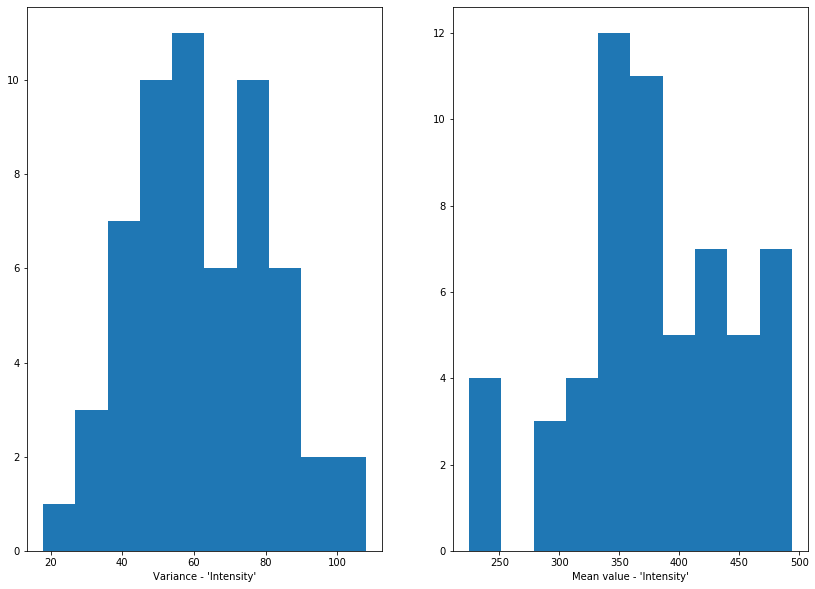

In [5]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(wroughs, len(wroughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(wroughs)
ax[0].set_xlabel("Variance - 'Intensity'")
ax[1].hist(wmeans)
ax[1].set_xlabel("Mean value - 'Intensity'")

In [6]:
filenames = glob('./tchakamau/Scans_of_balls/FG-S*.csv')
print(filenames)
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]

print(tables, len(tables))

['./tchakamau/Scans_of_balls\\FG-S-w0x-01.17_001.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_002.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_003.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_004.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_005.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_006.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_007.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_008.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_009.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_010.csv']
[            1           2          3           4           5          6     \
0      67.369776   74.643921  48.680818   61.582434  112.981065  24.652158   
1     122.909074   91.846076  55.315478   74.180294   33.860746  18.049473   
2     126.282359   76.594351  16.994322   63.197135   48.409037  41.182853   
3      82.237809   61.118807  21.007092   12.693783   50.007750  21.342822   
4      28.393147   66.698317  57.345844   31.366754    7.274145  14.

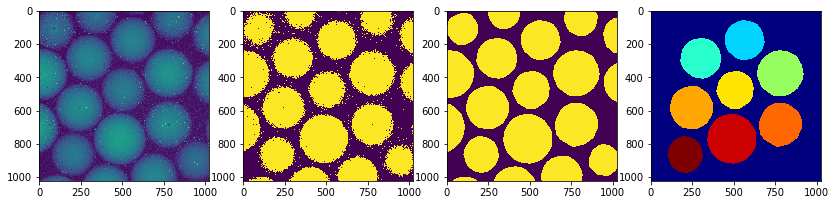

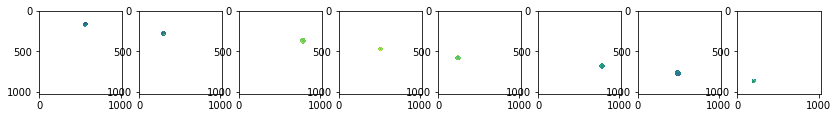

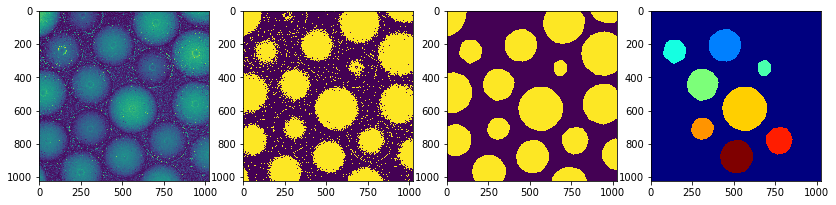

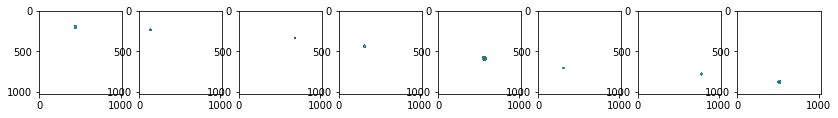

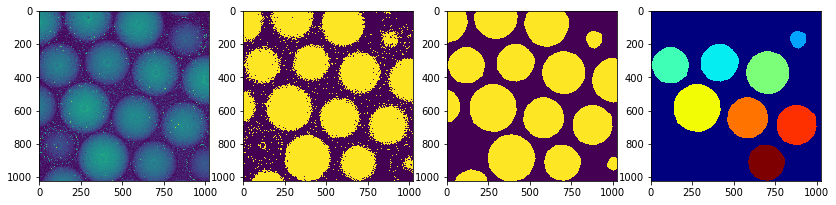

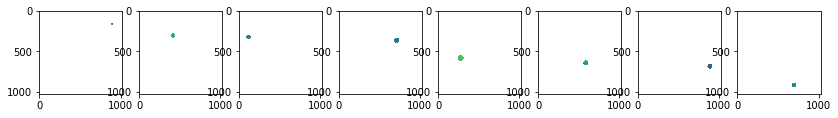

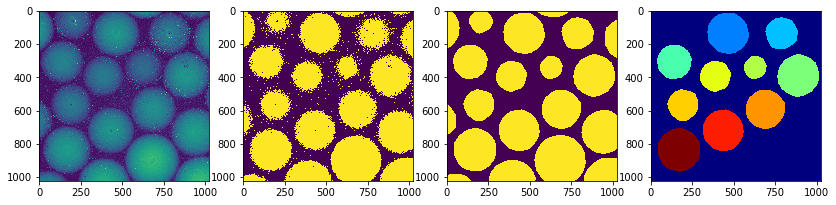

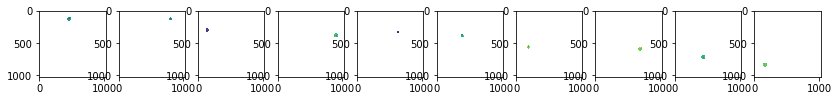

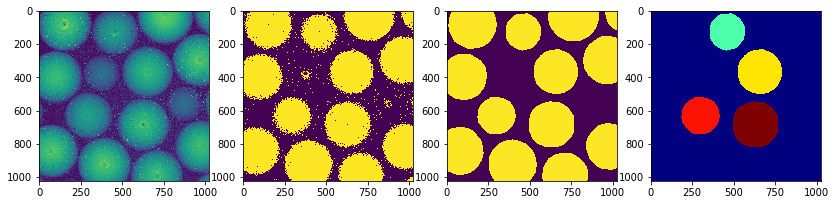

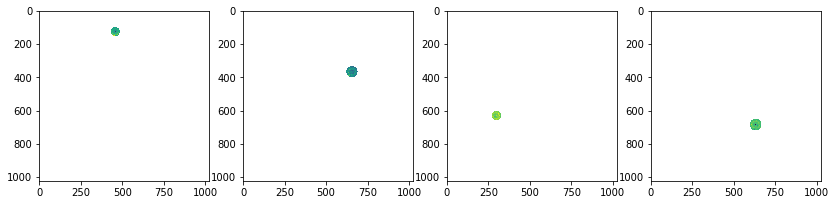

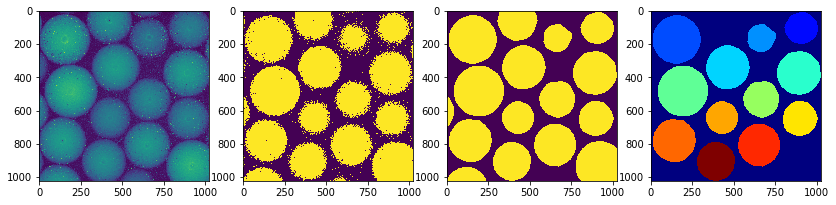

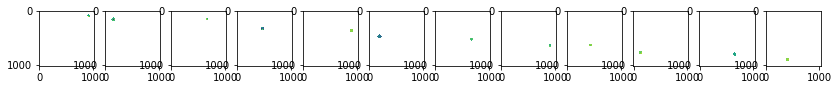

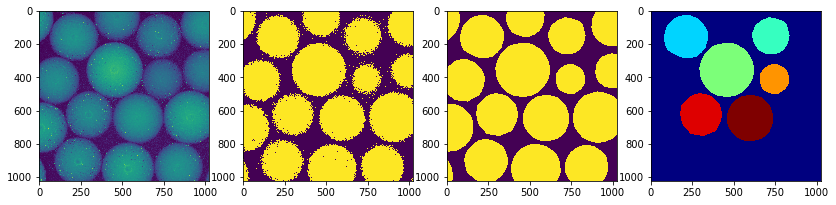

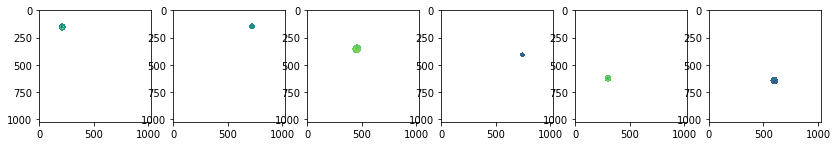

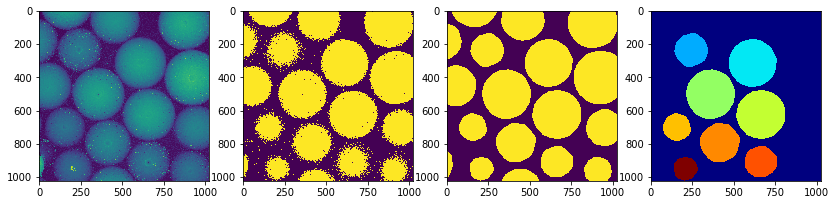

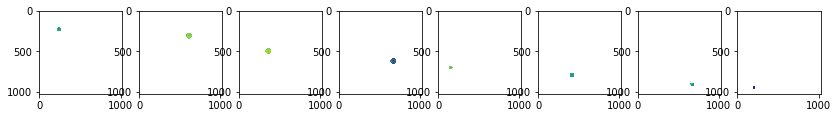

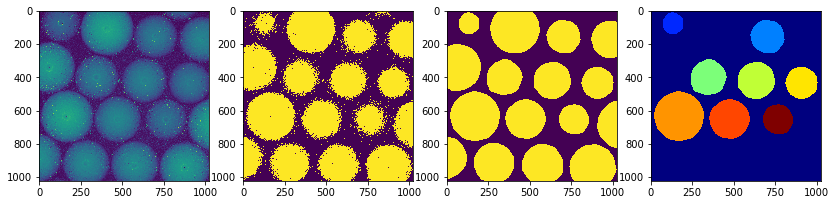

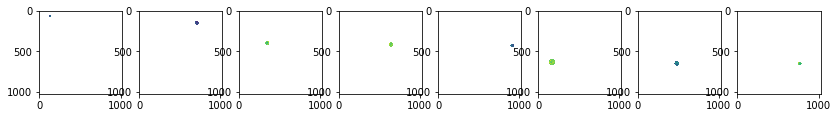

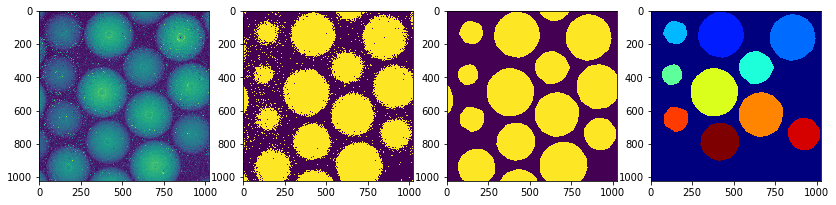

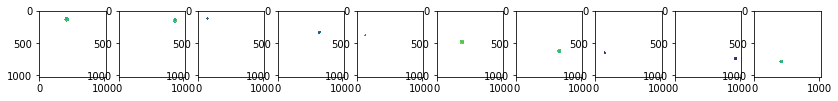

In [7]:
roughs = []
means = []

for table in tables:
    image = np.array(table, copy=True, order="C")
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(table)
    
    
    #balls = image#morphology.closing(image, disk(3))# 
    bw_balls = image  > filters.threshold_isodata(image)
    filled_balls = morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    labeled_balls = measure.label(filled_balls)
    inner_balls = segmentation.clear_border(labeled_balls)
    ax[1].imshow(bw_balls)
    ax[2].imshow(filled_balls)
    ax[3].imshow(inner_balls, cmap='jet')
    
    regions = measure.regionprops(inner_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    radii = [x/radrat for x in radii] # use half a radius
    fig, ax = plt.subplots(ncols = len(regions), figsize=(14, 10))
    ind = 0
    for radius, center in zip(radii, centers):
        circle = np.ones_like(image)
        coords=draw.circle(center[0], center[1], radius)
        circle[coords]=0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.std(ball_cap)
        mean = np.mean(ball_cap)
        roughs.append(roughness)
        means.append(mean)
        ax[ind].imshow(ball_cap)
        ind +=1
        

[9.614524685632848, 12.922582226917887, 22.558817745345493, 18.655238050209046, 12.639912919960576, 40.33879289224846, 9.934752810587103, 14.861653852709352, 17.574031856818582, 43.24037112470437, 18.96485294321477, 19.937515030190198, 12.982550113040434, 16.770048651446846, 20.198252020711287, 13.082499580805157, 24.339674240500784, 22.00928168997043, 21.958448512950927, 18.42531628337614, 18.45518459102679, 11.988332396723798, 24.7431527157812, 17.77446243815615, 15.547356320226747, 65.16840670000535, 13.179882717156875, 14.061794738982464, 21.53756203895316, 13.271548144532826, 22.11574640367365, 17.206612617949297, 27.8628260102989, 14.102165067706144, 43.03200943534767, 15.107068226040747, 17.69271784547674, 28.276636163611226, 23.31469129057036, 31.3730092128057, 37.9883824094589, 12.932569547807002, 17.71799747290129, 13.397075240401822, 23.2172585109725, 22.89166299601724, 14.874974643662584, 16.85665062347832, 22.5953577866867, 18.934185988466325, 13.038090971737228, 27.171811

Text(0.5, 0, "Mean value of intensity'")

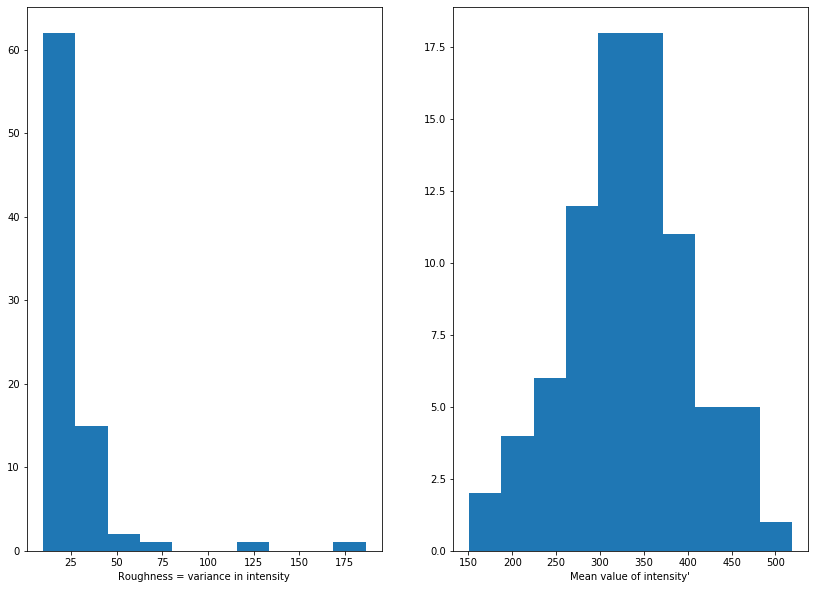

In [8]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(roughs, len(roughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(roughs)
ax[0].set_xlabel("Roughness = variance in intensity")
ax[1].hist(means)
ax[1].set_xlabel("Mean value of intensity'")

Text(0, 0.5, 'Frequency')

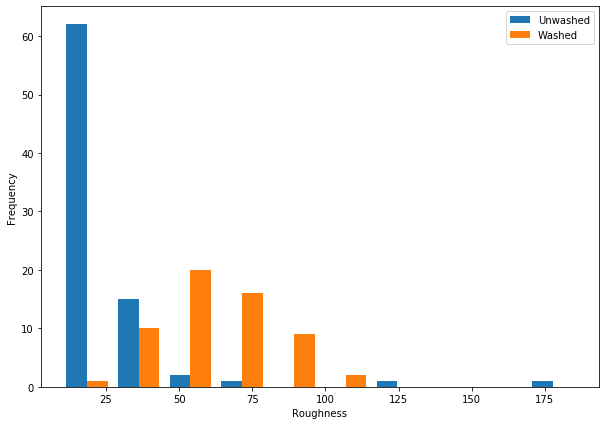

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist((roughs, wroughs), label = ("Unwashed", "Washed"), bins=10)
ax.legend(prop={'size': 10})
ax.set_xlabel("Roughness")
ax.set_ylabel("Frequency")
#ax.set_xlim(0, 1600)